In [283]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [284]:
df = pd.read_csv('pns-reduzido-2019-notnull.csv')

In [285]:
X = df

c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel

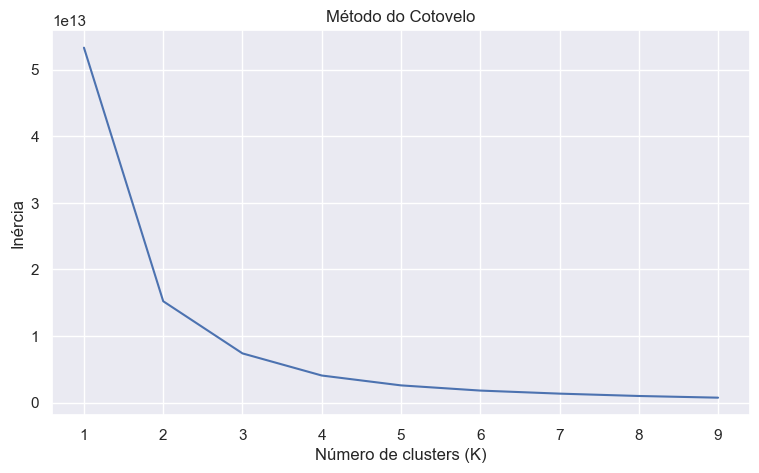

In [286]:
valores_k = []
inercias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

# Visualizar a relação entre inércia e K
plt.plot(valores_k, inercias)
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


In [287]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)

In [288]:
labels = kmeans.labels_

In [289]:
toc_count = {}  # Dicionário para armazenar as contagens de diagnóstico de TOC

for cluster_num in range(10):
    # Filtra as amostras no cluster atual
    cluster_samples = df[labels == cluster_num]
    
    # Conta quantos diagnósticos de TOC igual a 2.0 estão presentes no cluster
    toc_count[cluster_num] = (cluster_samples['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 3.0).sum()

# 'toc_count' agora contém o número de diagnósticos de TOC igual a 2.0 em cada cluster
print(toc_count)

{0: 643, 1: 476, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


In [290]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [291]:
k_values = range(2, 11)  # Defina a faixa de valores de k que deseja testar

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Substitua X pelos seus dados
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel Vidigal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gabriel

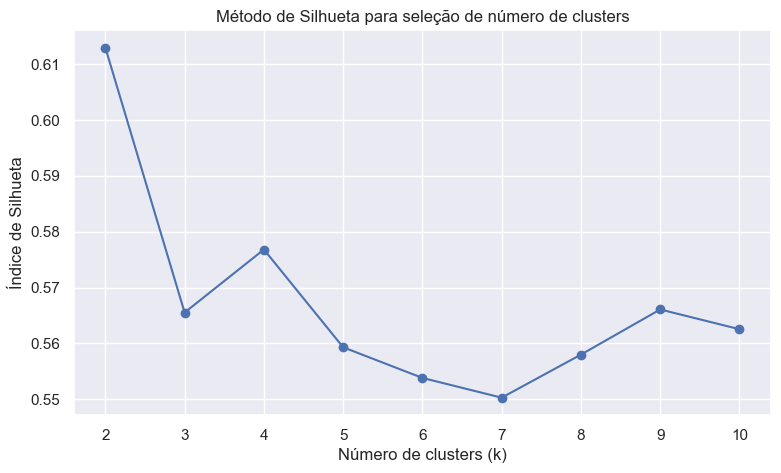

In [292]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de Silhueta para seleção de número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()

In [293]:
import pandas as pd


# Carregue as amostras do cluster com diagnóstico de TOC igual a 2.0
toc_cluster_samples = pd.read_csv('dados_cluster_toc.csv')  # Substitua 'dados_cluster_toc.csv' pelo nome do seu arquivo

# Selecione apenas as amostras do cluster com diagnóstico de TOC igual a 2.0
toc_cluster_samples = toc_cluster_samples[toc_cluster_samples['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 2.0]

# Adicione as amostras do cluster ao DataFrame original
df = pd.concat([df, toc_cluster_samples])

# Salve o DataFrame atualizado em um novo arquivo CSV
df.to_csv('df-mais-cluster.csv', index=False)  # Substitua 'df_atualizado.csv' pelo nome de arquivo desejado

# Agora 'df_atualizado.csv' contém as amostras do diagnóstico de TOC do original e do cluster juntas.


In [294]:
df1 = pd.read_csv('df-mais-cluster.csv')

In [295]:
agrupado = df1.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado

Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
1.0    3661
2.0    2238
dtype: int64

1.0    2238
2.0    2238
Name: Diagnóstico de TOC (Transtorno obsessivo compulsivo) , dtype: int64


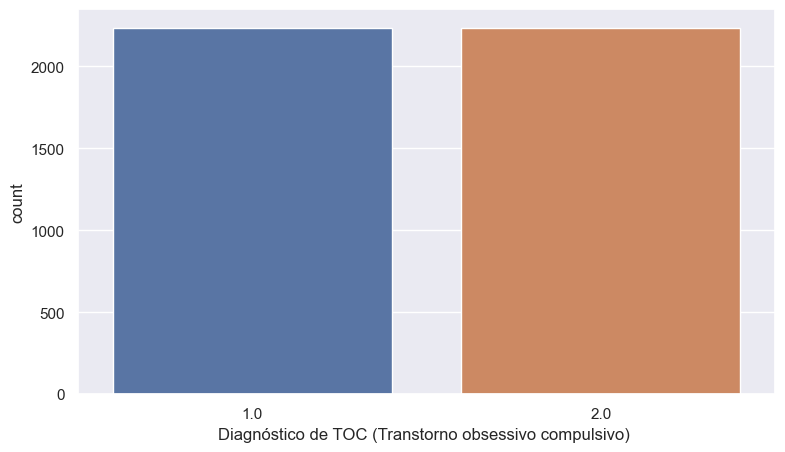

In [296]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Suponha que você já tenha carregado e preprocessado seus dados em um DataFrame chamado 'df'

# Seleciona apenas a coluna 'Diagnóstico de TOC (Transtorno obsessivo compulsivo)'
data_for_analysis = df[['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']]

# Separe os dados com Diagnóstico de TOC igual a 2.0 e 1.0
dados_2 = df[df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 2.0]
dados_1 = df[df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 1.0]

# Determine o tamanho do grupo com Diagnóstico de TOC igual a 2.0
total_instancias_2 = len(dados_2)

# Amostra aleatória do grupo com Diagnóstico de TOC igual a 1.0 para igualar o tamanho
dados_1_selecionados = dados_1.sample(n=total_instancias_2, random_state=12)

# Combine os dois grupos para criar um conjunto de dados balanceado
df_balanced = pd.concat([dados_1_selecionados, dados_2])
df_balanced = df_balanced.sample(frac=1)  # Embaralhe os dados

# Verifique a contagem de Diagnóstico de TOC no novo conjunto de dados
toc_counts = df_balanced['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].value_counts()
print(toc_counts)

# Plote um gráfico para visualizar os resultados
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set(rc={'figure.figsize': (9, 5)})
sns.countplot(x="Diagnóstico de TOC (Transtorno obsessivo compulsivo) ", data=df_balanced)
plt.show()


In [298]:
df1.to_csv('df-balanceado.csv', index=False)